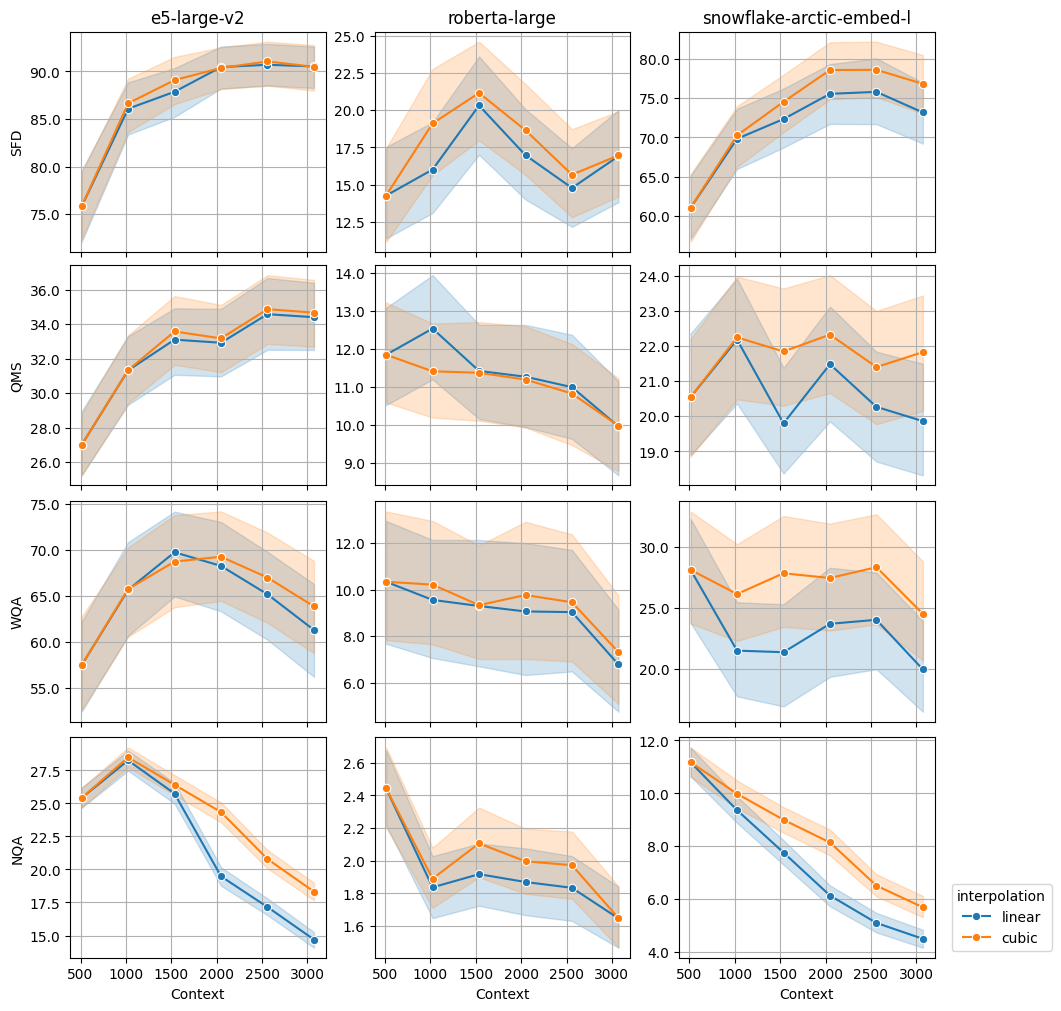

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


METRIC = 'ndcg_at_10'
METRIC_ALIAS = METRIC.replace('_at_', '@').upper()

df = pd.read_csv(f'../../data/{METRIC}.csv').rename({METRIC: METRIC_ALIAS}, axis=1)
models = df['model'].unique()
datasets = df['dataset'].unique()

ncols = len(models)
nrows = len(datasets)

fig, axes = plt.subplots(
    nrows, ncols, figsize=(3.5 * ncols, 2.5 * nrows), 
    sharex=True, 
    constrained_layout=True
)
for i, dataset in enumerate(datasets):
    for j, model in enumerate(models):
        ax = axes[i][j]
        
        # plot results
        df_filter = (df['dataset'] == dataset) & (df['model'] == model)
        sns.lineplot(
            data=df[df_filter],
            x='context',
            y=METRIC_ALIAS,
            hue='interpolation',
            marker='o',
            ax=ax
        )

        # set title for first plot
        if dataset == datasets[0]:
            ax.set_title(model)
        
        # set axes names
        ax.set_ylabel(f'{dataset}' if j == 0 else '')
        ax.set_xlabel('Context' if dataset == datasets[-1] else '')

        if model != models[-1] or dataset != datasets[-1]:
            ax.get_legend().remove()
        else:
            # ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand')
            ax.legend(bbox_to_anchor=(1.04, 0), loc='lower left', title='interpolation')

        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.grid(True)

plt.savefig('../figures/00. Benchmark Results.pdf', bbox_inches='tight', pad_inches=0)